# Exploration_3
## Cat whiskers sticker on your face
---
1. 스티커 구하기
2. 얼굴 검출 & 랜드마크 검출하기 : dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주기
3. 스티커 적용 위치 확인하기 : 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산하기 (코 끝인 33번 위치도 고려해보기)
4. 스티커 적용하기 : np.where를 사용해서 스티커 적용하기 (스티커를 조금 더 자연스럽게 보이게 하려면, 스티커 뒤로 원본 이미지가 같이 보이도록 만들어보자.)
5. 문제점 찾아보기 : 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해보자. 문제점이 무엇인지 최대한 자세하게 기록해보자. 문제점을 해결하기 위한 방법은 분명 존재할것이다.

### (1) 사진 준비하기

In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import dlib

* 이미지 처리를 위해 opencv와 노트북에 이미지를 출력하기 위한 matplotlib를 읽어온다.
### openCV?

* Open Source Computer Vision
* 실시간 이미지/영상 처리에 사용하는 오픈 소스 라이브러리
* Python, C++, Java와 같은 다양한 개발 환경을 지원
* 다양한 OS를 지원하는 크로스 플랫폼
* -> 이미지를 읽기 위해서 imread()함수 사용
* -> 이미지를 화면에 표시하기 위해서 imshow()함수 사용
* -> 이미지 본래 색상 공간(BGR)에서 다른 색상 공간(RGB)으로 변환할 때 cvtColor()함수 사용

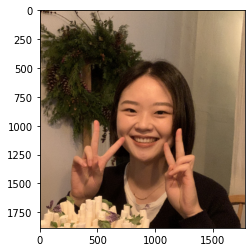

In [2]:
my_image_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/myimage.png'
img_bgr = cv2.imread(my_image_path) # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy() # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 이미지를 png(Portable Network Graphics)확장자로 불러오는 이유?
* png 파일은 무손실 압축을 사용하기 때문에 이미지 손실이 없고 고품질 이미지를 생성하여 이미지 편집에 많이 사용.
* png 파일은 배경이 투명해서 배경 이미지 위에 파일을 얹어 두 이미지를 자연스럽게 합성시킬 수 있음.
---
### COLOR_BGR2RGB 하는 이유?
* matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB순으로 사용한다. 그런데 opencv는 예외적으로 BGR을 사용한다. 따라서 색깔 보정처리가 필요하다.

### (2-1) 얼굴 검출하기 (face detection)

In [3]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)  # (image, num of image pyramid)
print(dlib_rects)

rectangles[[(664, 726) (1219, 1281)]]


### HOG?
* Histogram of Oriented Gradients
* 이미지에서 색상의 변화량을 나타낸다. 이미지로부터 물체의 특징만 잘 잡아내는 능력이 탁월하다.

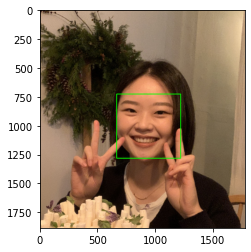

In [4]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA)
    # 처음에 2로 입력했을때는 인식상자가 나타나지 않았다. 그래서 5로 변경한 결과 상자를 얻을 수 있었다. 왜...?
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

* cv2.rectangle() 함수를 사용하여 사각형을 그릴 수 있다.
1. 사각형의 두 꼭지점 좌표 설정하기
2. 사각형 위치 정보(시작점, 높이, 길이)
* 이렇게 총 두 가지 방법으로 그릴 수 있다. 여기서는 첫 번째 방법을 사용하였다. 
* cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None, shift=None)
* 처음에 노드에서 배웠던데로 thickness=2를 주었더니 사각형이 출력되지 않았다. 그래서 두께를 좀 더 늘려서 5로 바꿨더니 제대로 출력이 되었다. 아무리 구글링을 해봐도 -1일때 사각형이 채워지는 내용 말고는 얻을 수 있는 정보가 없었다...

### (2-2) 얼굴 랜드마크 검출하기 (face landmark detection)

In [1]:
model_path = os.getenv("HOME")+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print("랜드마크 개수 : ", len(list_landmarks[0]))

NameError: name 'os' is not defined

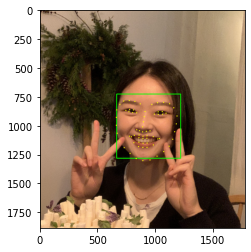

In [6]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0,255,255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### (3) 스티커 적용하기

In [7]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33]) # 코 끝의 indexsms 33 이다.
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(889, 1053)
(x,y) : (889,1053)
(w,h) : (556,556)


(556, 556, 3)


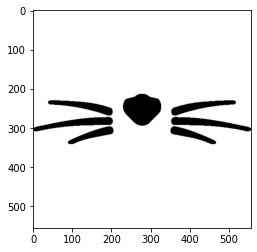

In [8]:
sticker_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [9]:
refined_x = x - w // 2 # 889 - 556/2
refined_y = y - w //2 # 1053 - 556/2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (611,775)
(x,y) : (611,775)


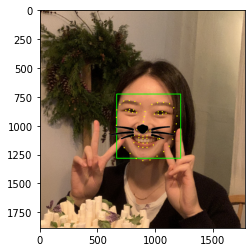

In [10]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# np.where에서 img_sticker==0이면 스티커 흰배경을 그대로 남아있고, 검은 고양이 수염만 투명하게 변한다....
# 따라서 img_sticker==255로 수정하여 스티커 흰배경을 투명하게 만들고, 검은 수염만을 그대로 둠.

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

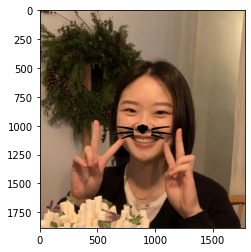

In [11]:
# 얼굴인식 상자를 제거해준다.
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 다른 이미지에도 적용해보기
## 1. 촬영거리가 멀고 얼굴 반쪽이 어두운 이미지에 적용해보기

### (1) 사진 준비하기

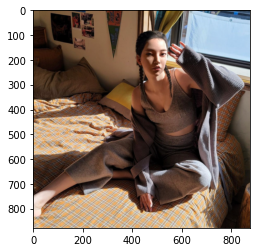

In [17]:
image1_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/image1.png'
img1_bgr = cv2.imread(image1_path) # OpenCV로 이미지를 불러옵니다
img1_show = img1_bgr.copy() # 출력용 이미지를 따로 보관합니다
img1_rgb = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)
plt.show()

### (2-1) 얼굴 검출하기 (face detection)

In [18]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img1_rgb, 1)
print(dlib_rects)

rectangles[[(438, 152) (545, 259)]]


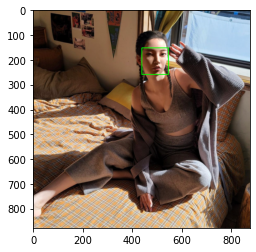

In [19]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img1_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img1_show_rgb = cv2.cvtColor(img1_show, cv2.COLOR_BGR2RGB)
plt.imshow(img1_show_rgb)
plt.show()

### (2-2) 얼굴 랜드마크 검출하기 (face landmark detection)

In [20]:
model_path = os.getenv("HOME")+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img1_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


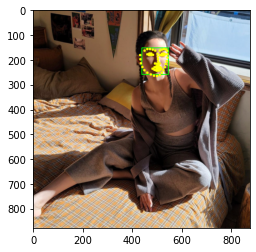

In [21]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img1_show, point, 5, (0,255,255), -1)
        
img1_show_rgb = cv2.cvtColor(img1_show, cv2.COLOR_BGR2RGB)
plt.imshow(img1_show_rgb)
plt.show()

### (3) 스티커 적용하기

In [22]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(502, 217)
(x,y) : (502,217)
(w,h) : (108,108)


(108, 108, 3)


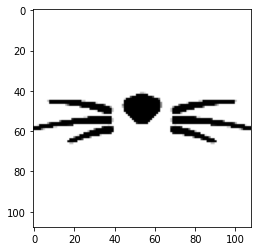

In [23]:
sticker_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [24]:
refined_x = x - w // 2
refined_y = y - w //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (448,163)
(x,y) : (448,163)


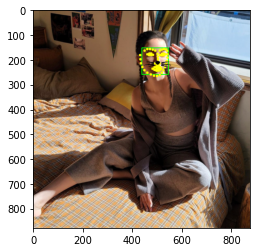

In [25]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area1 = img1_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img1_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area1,img_sticker).astype(np.uint8)
# np.where에서 img_sticker==0이면 스티커 흰배경을 그대로 남아있고, 검은 고양이 수염만 투명하게 변한다....

plt.imshow(cv2.cvtColor(img1_show, cv2.COLOR_BGR2RGB))
plt.show()

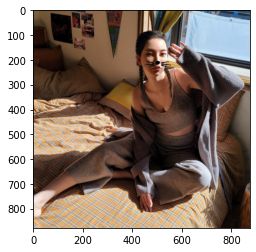

In [26]:
sticker_area = img1_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img1_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### (4) 기울어진 각도 반영하기

In [27]:
'''
sticker_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

img_stk_rtt = cv2.getRotationMatrix2D((w/2, h/2), 10, 1)

rtt_img_stk = cv2.warpAffine(img_sticker, img_stk_rtt, (w, h))

cv2.imshow('Original', img_sticker)
cv2.imshow('Rotated', rtt_img_stk)

cv2.waitKey()
cv2.destroyAllWindows()
'''

'\nsticker_path = os.getenv("HOME")+\'/aiffel/camera_sticker/images/cat_whiskers.png\'\nimg_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다\nimg_sticker = cv2.resize(img_sticker, (w,h))\nprint(img_sticker.shape)\n\nimg_stk_rtt = cv2.getRotationMatrix2D((w/2, h/2), 10, 1)\n\nrtt_img_stk = cv2.warpAffine(img_sticker, img_stk_rtt, (w, h))\n\ncv2.imshow(\'Original\', img_sticker)\ncv2.imshow(\'Rotated\', rtt_img_stk)\n\ncv2.waitKey()\ncv2.destroyAllWindows()\n'

* 위의 코딩은 기울어진 각도를 반영하여, 스티커 이미지를 중심점 기준으로 회전시키는 방법이다. 그러나, 무엇이 문제인지 계속 'Dead Kernel'이라는 문구가 오른쪽 상단에 표시되고 실행이 중단된다. 그래서 아래의 기울어진 이미지 모두 해결책을 찾지 못했다...

## 2. 얼굴각도가 기울어진 이미지에 적용해보기

### (1) 사진 준비하기

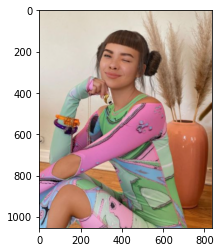

In [28]:
image2_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/image2.png'
img2_bgr = cv2.imread(image2_path) # OpenCV로 이미지를 불러옵니다
img2_show = img2_bgr.copy() # 출력용 이미지를 따로 보관합니다
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)
plt.show()

### (2-1) 얼굴 검출하기 (face detection)

In [29]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img2_rgb, 1)
print(dlib_rects)

rectangles[[(283, 180) (469, 366)]]


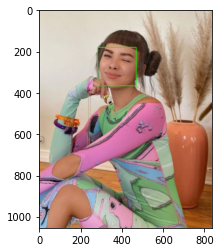

In [30]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img2_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img2_show_rgb = cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB)
plt.imshow(img2_show_rgb)
plt.show()

### (2-2) 얼굴 랜드마크 검출하기 (face landmark detection)

In [31]:
model_path = os.getenv("HOME")+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img2_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


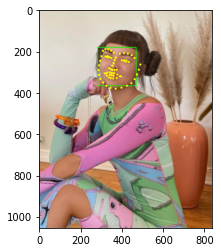

In [32]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img2_show, point, 5, (0,255,255), -1)
        
img2_show_rgb = cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB)
plt.imshow(img2_show_rgb)
plt.show()

### (3) 스티커 적용하기

In [33]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(353, 289)
(x,y) : (353,289)
(w,h) : (187,187)


(187, 187, 3)


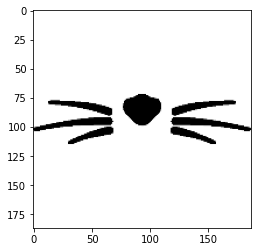

In [34]:
sticker_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [35]:
refined_x = x - w // 2
refined_y = y - w //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (260,196)
(x,y) : (260,196)


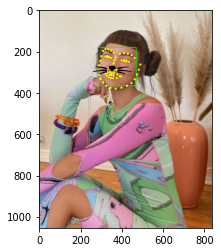

In [36]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img2_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img2_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# np.where에서 img_sticker==0이면 스티커 흰배경을 그대로 남아있고, 검은 고양이 수염만 투명하게 변한다....

plt.imshow(cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB))
plt.show()

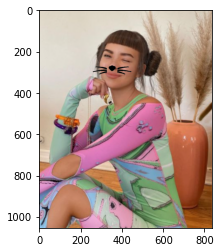

In [37]:
sticker_area = img2_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img2_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### (4) 기울어진 각도 반영하기

* 1의 예시처럼 작동시키지 못하였다...

## 3. 촬영거리가 가깝고 얼굴각도가 기울어진 이미지에 적용해보기

### (1) 사진 준비하기

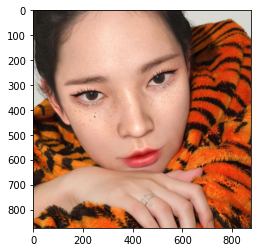

In [38]:
image3_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/image3.png'
img3_bgr = cv2.imread(image3_path) # OpenCV로 이미지를 불러옵니다
img3_show = img3_bgr.copy() # 출력용 이미지를 따로 보관합니다
img3_rgb = cv2.cvtColor(img3_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img3_rgb)
plt.show()

### (2-1) 얼굴 검출하기 (face detection)

In [39]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img3_rgb, 1)
print(dlib_rects)

rectangles[[(110, 110) (664, 665)]]


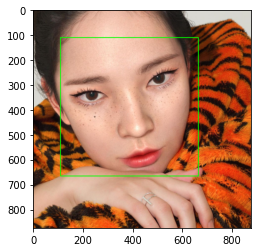

In [40]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img3_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img3_show_rgb = cv2.cvtColor(img3_show, cv2.COLOR_BGR2RGB)
plt.imshow(img3_show_rgb)
plt.show()

### (2-2) 얼굴 랜드마크 검출하기 (face landmark detection)

In [41]:
model_path = os.getenv("HOME")+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img3_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


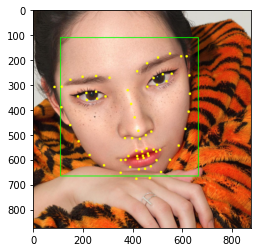

In [42]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img3_show, point, 5, (0,255,255), -1)
        
img3_show_rgb = cv2.cvtColor(img3_show, cv2.COLOR_BGR2RGB)
plt.imshow(img3_show_rgb)
plt.show()

### (3) 스티커 적용하기

In [43]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(429, 516)
(x,y) : (429,516)
(w,h) : (555,555)


(555, 555, 3)


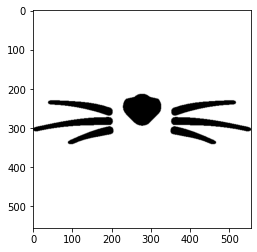

In [44]:
sticker_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [45]:
refined_x = x - w // 2
refined_y = y - w //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (152,239)
(x,y) : (152,239)


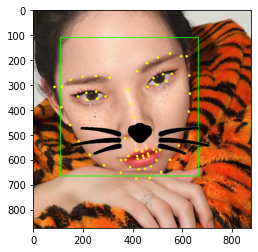

In [46]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img3_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img3_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# np.where에서 img_sticker==0이면 스티커 흰배경을 그대로 남아있고, 검은 고양이 수염만 투명하게 변한다....

plt.imshow(cv2.cvtColor(img3_show, cv2.COLOR_BGR2RGB))
plt.show()

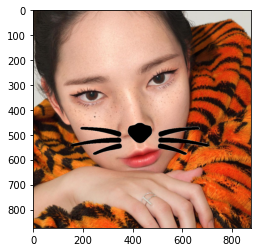

In [47]:
sticker_area = img3_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img3_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img3_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### (4) 기울어진 각도 반영하기

* 1의 예시처럼 작동시키지 못하였다...

## 4. 눈을 감고 있는 이미지에 적용해보기

### (1) 사진 준비하기

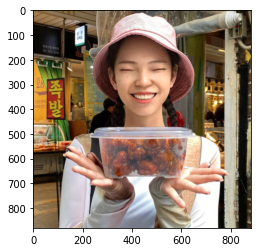

In [48]:
image4_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/image4.png'
img4_bgr = cv2.imread(image4_path) # OpenCV로 이미지를 불러옵니다
img4_show = img4_bgr.copy() # 출력용 이미지를 따로 보관합니다
img4_rgb = cv2.cvtColor(img4_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img4_rgb)
plt.show()

### (2-1) 얼굴 검출하기 (face detection)

In [49]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img4_rgb, 1)
print(dlib_rects)

rectangles[[(319, 171) (587, 439)]]


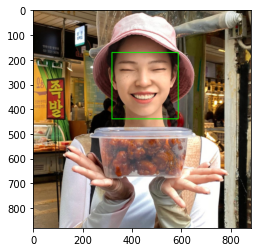

In [50]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img4_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img4_show_rgb = cv2.cvtColor(img4_show, cv2.COLOR_BGR2RGB)
plt.imshow(img4_show_rgb)
plt.show()

### (2-2) 얼굴 랜드마크 검출하기 (face landmark detection)

In [51]:
model_path = os.getenv("HOME")+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img4_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


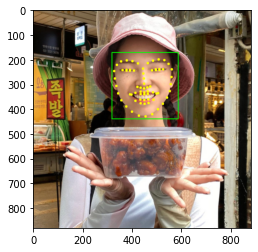

In [52]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img4_show, point, 5, (0,255,255), -1)
        
img4_show_rgb = cv2.cvtColor(img4_show, cv2.COLOR_BGR2RGB)
plt.imshow(img4_show_rgb)
plt.show()

### (3) 스티커 적용하기

In [53]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(449, 316)
(x,y) : (449,316)
(w,h) : (269,269)


(269, 269, 3)


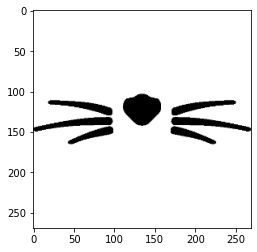

In [54]:
sticker_path = os.getenv("HOME")+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [55]:
refined_x = x - w // 2
refined_y = y - w //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (315,182)
(x,y) : (315,182)


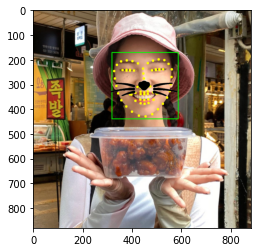

In [56]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img4_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img4_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# np.where에서 img_sticker==0이면 스티커 흰배경을 그대로 남아있고, 검은 고양이 수염만 투명하게 변한다....

plt.imshow(cv2.cvtColor(img4_show, cv2.COLOR_BGR2RGB))
plt.show()

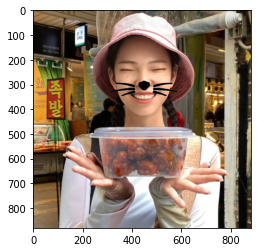

In [57]:
sticker_area = img4_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img4_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img4_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

### 아쉬운점
1. 얼굴 검출 후, 찾은 얼굴 영역에 박스 리스트를 적용하는 부분에서 thickness값에 따라 적용이 될 때도 있고, 적용이 되지 않을 때도 있었다. 여러 값을 적용해본 끝에 박스를 출력할 수 있었으나, 그 이유를 찾지 못해서 아쉬움이 크다.
2. 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따라 얼굴 검출과 랜드마크는 꽤나 잘 적용이 되었다. 그러나 기울어진 이미지에 스티커를 올리기 위해 도형각도변형을 시도하였으나, 잘 작동되지 않았다. 더 속상한 건 왜 오류가 뜨는지 왜 작동하지않는건지 해결하지 못한 점이다. 수학공부가 필요하다고 절실하게 느꼈다.

### 배운점
1. opencv는 이미지를 출력할 때 BGR순으로 불러온다. 따라서 cv2.cvtColor(img, cv2.COLOR_BGR2RGB)함수를 사용해서 우리에게 익숙한 RGB로 변환이 필요하다.
2. png파일은 배경을 투명하게 읽어올 수 있어 두 이미지를 합칠 때 유용하다.